In [1]:
from fastai.vision.all import *
from fastbook import *
matplotlib.rc('image', cmap='Greys')

load images

In [2]:
path = untar_data(URLs.MNIST_SAMPLE)

In [3]:
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()

In [4]:
im3_path = threes[1]
im3 = Image.open(im3_path)
im3

In [5]:
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]

stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255

In [6]:
valid_3_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255
valid_7_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255

Dataset

In [7]:
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)
train_y = tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)
dset = list(zip(train_x,train_y))

In [8]:
valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1, 28*28)
valid_y = tensor([1]*len(valid_3_tens) + [0]*len(valid_7_tens)).unsqueeze(1)
valid_dset = list(zip(valid_x,valid_y))

In [19]:
dl = DataLoader(dset, batch_size=256)
valid_dl = DataLoader(valid_dset, batch_size=256)

dls = DataLoaders(dl, valid_dl)

loss and accuracy

In [18]:
# is_3?-model
def mnist_loss(predictions, targets):
    predictions = predictions.sigmoid()
    return torch.where(targets==1, 1-predictions, predictions).mean()

def batch_accuracy(xb, yb):
    preds = xb.sigmoid()
    correct = (preds>0.5) == yb
    return correct.float().mean()

Learner

In [20]:
# linear model
linear_model = nn.Linear(28*28,1)
w,b = linear_model.parameters()
w.shape,b.shape

(torch.Size([1, 784]), torch.Size([1]))

In [21]:
learn = Learner(dls, linear_model, opt_func=SGD, 
               loss_func=mnist_loss, metrics=batch_accuracy)

In [22]:
#train model
learn.fit(10, lr=1)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.636589,0.503365,0.495584,00:00
1,0.484513,0.201790,0.824338,00:00
2,0.179194,0.169240,0.848381,00:00
3,0.079261,0.102789,0.914622,00:00
4,0.042457,0.075846,0.934740,00:00
5,0.028078,0.061122,0.948479,00:00
6,0.022154,0.051908,0.956330,00:00
7,0.019506,0.045764,0.963199,00:00
8,0.018155,0.041438,0.966143,00:00
9,0.017339,0.038241,0.967615,00:00


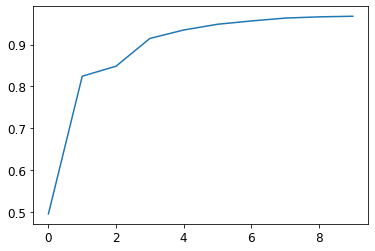

In [23]:
plt.plot(L(learn.recorder.values).itemgot(2));